##Question 1:


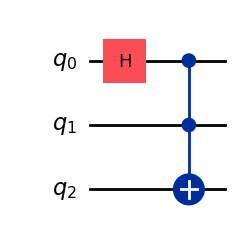

In [68]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


qc = QuantumCircuit(3)

qc.h(0)


qc.ccx(0,1,2)



qc.draw('mpl')


{'001': 524, '000': 500}


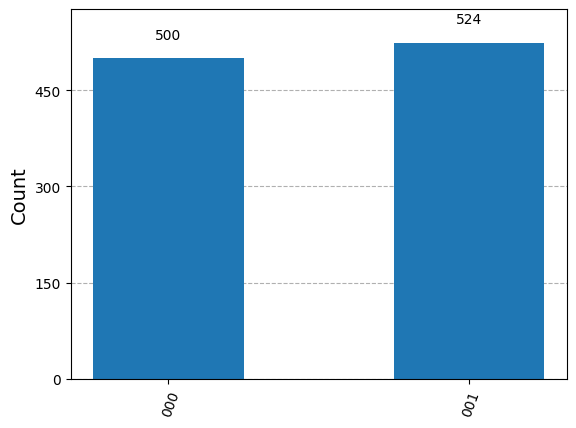

In [71]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(3, 3)

qc.h(0)
qc.ccx(0,1,2)

qc.measure([0, 1], [0, 1])

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()


counts = result.get_counts(qc)


print(counts)


plot_histogram(counts)

In [81]:


from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def run_quantum_circuit(num_qubits, initial_state=None):
    qc = QuantumCircuit(num_qubits, num_qubits)

    if initial_state:
        # Apply initial state preparation if provided.
        for i, val in enumerate(initial_state):
          if val == 1:
            qc.x(i)


    qc.h(0)
    if num_qubits >= 3:
        qc.ccx(0, 1, 2)

    qc.measure(range(num_qubits), range(num_qubits))

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts


input_combinations = [
    (2, [0, 0]),
    (2, [1, 0]),
    (3, [0, 0, 0]),
    (3, [1, 0, 0]),
    (3, [0, 1, 0]),
    (3, [0, 0, 1]),
    (3, [1, 1, 1]),

]


for qubits, initial_state in input_combinations:
    print(f"\nRunning circuit with {qubits} qubits and initial state: {initial_state}")
    counts = run_quantum_circuit(qubits, initial_state)
    print(counts)
    plot_histogram(counts)
    plt.show()


Running circuit with 2 qubits and initial state: [0, 0]
{'01': 509, '00': 515}

Running circuit with 2 qubits and initial state: [1, 0]
{'00': 511, '01': 513}

Running circuit with 3 qubits and initial state: [0, 0, 0]
{'000': 511, '001': 513}

Running circuit with 3 qubits and initial state: [1, 0, 0]
{'000': 499, '001': 525}

Running circuit with 3 qubits and initial state: [0, 1, 0]
{'111': 535, '010': 489}

Running circuit with 3 qubits and initial state: [0, 0, 1]
{'101': 523, '100': 501}

Running circuit with 3 qubits and initial state: [1, 1, 1]
{'011': 485, '110': 539}


The output for the initial quantum circuit with no initial state shows a roughly equal superposition of states '000' and '100' due to the Hadamard gate applied to qubit 0 and controlled-controlled-not gate. The measurement of qubits 0 and 1 collapses the superposition.  The other inputs demonstrate the effect of the initial state on the measured probabilities of different outcomes due to the initialization of qubits using x gates, when `initial_state` is given. For example, if initial state is `[1,0,0]`, then the first qubit is initialized to state `1`.

##Question 2:

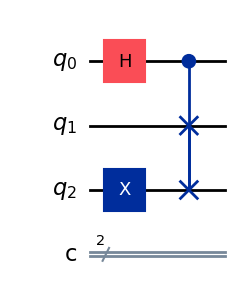

In [86]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(3, 2)

qc.h(0)
qc.x(2)
qc.cswap(0,1,2)

qc.draw('mpl')

{'11': 500, '00': 524}


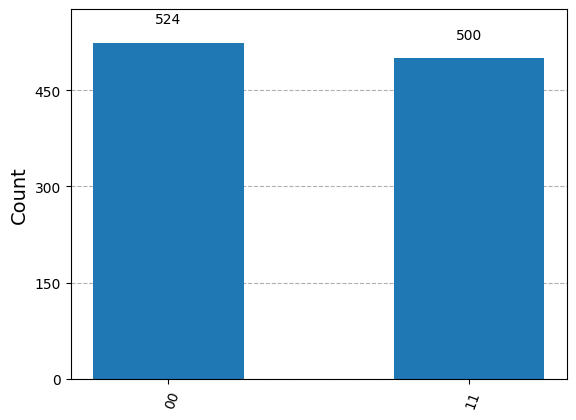

In [85]:
qc.measure([0, 1], [0, 1])


simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()


counts = result.get_counts(qc)


print(counts)


plot_histogram(counts)

The initial circuit applies a Hadamard gate to qubit 0, creating a superposition. The Toffoli gate then affects qubit 2 based on qubits 0 and 1. Measuring qubits 0 and 1 collapses the superposition, resulting in roughly equal probabilities for '00' and '10' (since qubit 2's state depends on the first two and isn't measured).  The `run_quantum_circuit` function applies an X gate to qubits specified in `initial_state`, altering the starting state and impacting subsequent measurement probabilities.  The final circuit includes a Hadamard gate on qubit 0, an X gate on qubit 2, and a controlled swap gate between 0,1,2. The initial state of qubit 2 is flipped, and the cswap operation is performed. Measuring qubits 0 and 1 reveals the results of these operations.

##Question 3:

### (a)

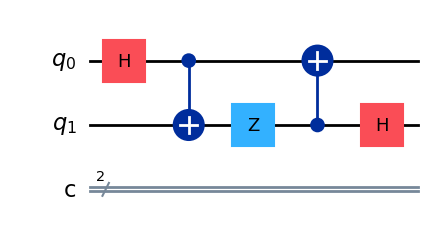

In [94]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.z(1)
qc.cx(1, 0)
qc.h(1)

qc.draw('mpl')

{'10': 1024}


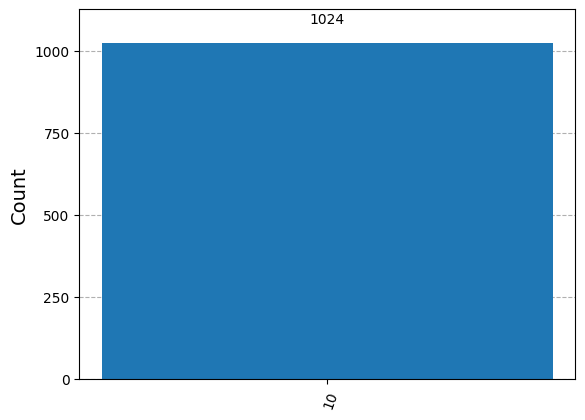

In [95]:
qc.measure([0, 1], [0, 1])


simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()


counts = result.get_counts(qc)


print(counts)


plot_histogram(counts)

## (b)

In [96]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector




def run_quantum_circuit(num_qubits, initial_state=None):
    qc = QuantumCircuit(num_qubits, num_qubits)

    if initial_state:

        for i, val in enumerate(initial_state):
          if val == 1:
            qc.x(i)

    qc.h(0)
    if num_qubits >= 3:
        qc.ccx(0, 1, 2)


    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    statevector = result.get_statevector(qc)
    print("Statevector:")
    print(statevector)

    qc.measure(range(num_qubits), range(num_qubits))

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts, statevector


input_combinations = [
    (2, [0, 0]),
    (2, [1, 0]),
    (3, [0, 0, 0]),
    (3, [1, 0, 0]),
    (3, [0, 1, 0]),
    (3, [0, 0, 1]),
    (3, [1, 1, 1]),
]

for qubits, initial_state in input_combinations:
    print(f"\nRunning circuit with {qubits} qubits and initial state: {initial_state}")
    counts, statevector = run_quantum_circuit(qubits, initial_state)  # Store statevector
    print(counts)
    plot_histogram(counts)
    plt.show()


Running circuit with 2 qubits and initial state: [0, 0]
Statevector:
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 509, '00': 515}

Running circuit with 2 qubits and initial state: [1, 0]
Statevector:
Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2))
{'00': 510, '01': 514}

Running circuit with 3 qubits and initial state: [0, 0, 0]
Statevector:
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
{'001': 490, '000': 534}

Running circuit with 3 qubits and initial state: [1, 0, 0]
Statevector:
Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.     